<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Plotting-DIST2-&amp;-DIST3" data-toc-modified-id="Plotting-DIST2-&amp;-DIST3-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span>Plotting DIST2 &amp; DIST3</a></span></li><li><span><a href="#Plotting-using-MSMExplorer" data-toc-modified-id="Plotting-using-MSMExplorer-0.2"><span class="toc-item-num">0.2&nbsp;&nbsp;</span>Plotting using MSMExplorer</a></span></li><li><span><a href="#Plotting-Tyr-Trp-&amp;-Tyr-Asp" data-toc-modified-id="Plotting-Tyr-Trp-&amp;-Tyr-Asp-0.3"><span class="toc-item-num">0.3&nbsp;&nbsp;</span>Plotting Tyr-Trp &amp; Tyr-Asp</a></span></li><li><span><a href="#Plotting-Dihedral-angles" data-toc-modified-id="Plotting-Dihedral-angles-0.4"><span class="toc-item-num">0.4&nbsp;&nbsp;</span>Plotting Dihedral angles</a></span></li><li><span><a href="#Plotting-Histograms" data-toc-modified-id="Plotting-Histograms-0.5"><span class="toc-item-num">0.5&nbsp;&nbsp;</span>Plotting Histograms</a></span></li><li><span><a href="#Plotting-Trp-Dihedrals" data-toc-modified-id="Plotting-Trp-Dihedrals-0.6"><span class="toc-item-num">0.6&nbsp;&nbsp;</span>Plotting Trp Dihedrals</a></span></li><li><span><a href="#Plotting-biased-vs-unbiased-landscape" data-toc-modified-id="Plotting-biased-vs-unbiased-landscape-0.7"><span class="toc-item-num">0.7&nbsp;&nbsp;</span>Plotting biased vs unbiased landscape</a></span></li><li><span><a href="#Plotting-HILLS" data-toc-modified-id="Plotting-HILLS-0.8"><span class="toc-item-num">0.8&nbsp;&nbsp;</span>Plotting HILLS</a></span></li><li><span><a href="#Plotting-c(t)-metadynamics" data-toc-modified-id="Plotting-c(t)-metadynamics-0.9"><span class="toc-item-num">0.9&nbsp;&nbsp;</span>Plotting c(t) metadynamics</a></span></li><li><span><a href="#Plotting-4Z22-MD" data-toc-modified-id="Plotting-4Z22-MD-0.10"><span class="toc-item-num">0.10&nbsp;&nbsp;</span>Plotting 4Z22-MD</a></span></li></ul></li></ul></div>

In [1]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from collections import namedtuple
from scipy.interpolate import griddata
import numpy as np
import pandas as pd
import matplotlib.colors as mcolors
import matplotlib.cm as cm
import os
import sys
import MDAnalysis as mda
import math
from numpy.linalg import norm
print("Required packages are imported")

Required packages are imported


In [2]:
#Color dictionaries: col1-Wes Anderson, col2-colorbrewer colorblind-safe
col1 = {'red': (0.58, 0.29, 0.31) , 'yellow': (0.76, 0.56, 0.00), 'blue': (0.38, 0.54, 0.60), 'green': (0.43, 0.60, 0.48)}
col2 = {'red': '#e66101' , 'orange': '#fdb863', 'lavender': '#b2abd2', 'purple': '#5e3c99'}
print("Colour dictionaries are defined")

Colour dictionaries are defined


## Plotting DIST2 & DIST3

[ 12.89099  12.91152  13.03394 ...,  10.26316   9.88224  10.09814]
x-axis minimum and maximum is 0.0 and 442.0
y1-axis minimum and maximum is 6.8 and 21.9
y2-axis minimum and maximum is 12.8 and 16.7


<IPython.core.display.Javascript object>


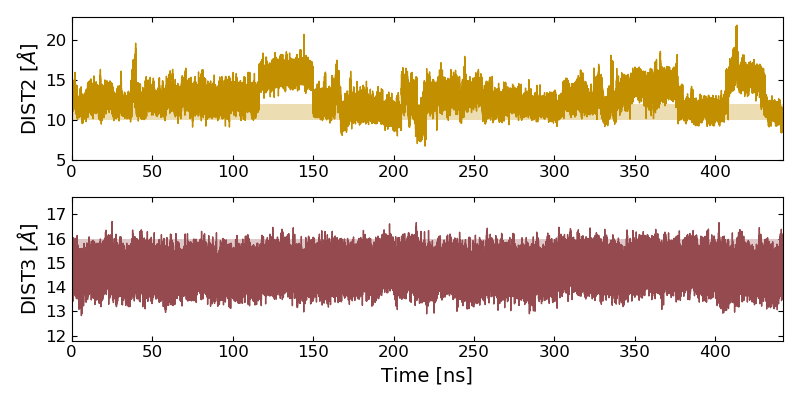

In [13]:
#Plot the CV space that has been sampled during the Funnel MetaD simulation#
%matplotlib notebook

#Read time and convert to ns
Time=np.loadtxt(f"COLVAR", comments="#")[:, 0]/1000
#Read CVs and convert to Angstrom
lp=np.loadtxt(f"COLVAR", comments="#")[:, 1]*10
ld=np.loadtxt(f"COLVAR", comments="#")[:, 2]*10
print(lp)
xmin=float("{0:.0f}".format(np.amin(Time)))              
xmax=float("{0:.0f}".format(np.amax(Time)))
y1min=float("{0:.1f}".format(np.amin(lp)))
y1max=float("{0:.1f}".format(np.amax(lp))) 
y2min=float("{0:.1f}".format(np.amin(ld)))
y2max=float("{0:.1f}".format(np.amax(ld))) 

#leg=[f"Run{run}"]
large_font=14
small_font=12
print(f"x-axis minimum and maximum is {xmin} and {xmax}")
print(f"y1-axis minimum and maximum is {y1min} and {y1max}")
print(f"y2-axis minimum and maximum is {y2min} and {y2max}")             
              
fig, (ax1, ax2) = plt.subplots(2,1,figsize=(8,4))
#fig.suptitle(f"Run{run}")
ax1.plot(Time, lp, color=col1['yellow'], linewidth=1.0)
ax2.plot(Time, ld, color=col1['red'], linewidth=1.0)
ax1.set_xlim([xmin, xmax])
ax2.set_xlim([xmin, xmax])
ax1.set_ylim([y1min-1, y1max+1])
ax2.set_ylim([y2min-1, y2max+1])
ax1.xaxis.set_ticks(np.arange(xmin, xmax+1, 50))
ax2.xaxis.set_ticks(np.arange(xmin, xmax+1, 50))
ax1.yaxis.set_ticks(np.arange(int(y1min-1), int(y1max)+2, 5))
ax2.yaxis.set_ticks(np.arange(int(y2min), int(y2max)+2, 1.0))
#ax1.axes.get_xaxis().set_visible(False)
ax2.set_xlabel('Time [ns]', fontsize=large_font)
ax1.set_ylabel('DIST2 [$\AA$]', fontsize=large_font)
ax2.set_ylabel('DIST3 [$\AA$]', fontsize=large_font)
ax1.tick_params(axis='both', bottom=True, top=True, right=True, which='major', labelbottom=True, labeltop=False, direction='in', labelsize=small_font)
ax2.tick_params(axis='both', bottom=True, top=True, right=True, which='major', labelbottom=True, labeltop=False, direction='in', labelsize=small_font)
# ax1.axhline(3.0, color='black',  linestyle='dashed')
# ax1.axhline(-4.0, color='black',  linestyle='dashed')
# ax2.axhline(4.0, color='black',  linestyle='dashed')
ax1.axhspan(10, 12, facecolor=col1['yellow'], alpha=0.3)
ax2.axhspan(14, 16, facecolor=col1['red'], alpha=0.3)
# ax1.legend(leg, loc=1,  fancybox=True, shadow=True)
# ax2.legend(leg, loc=1,  fancybox=True, shadow=True)


fig.subplots_adjust(wspace=0, hspace=0)

fig.tight_layout()

plt.savefig(f"dist2-dist3.png", bbox_inches='tight', dpi=600)
plt.show()
#plt.close()

## Plotting using MSMExplorer

<IPython.core.display.Javascript object>


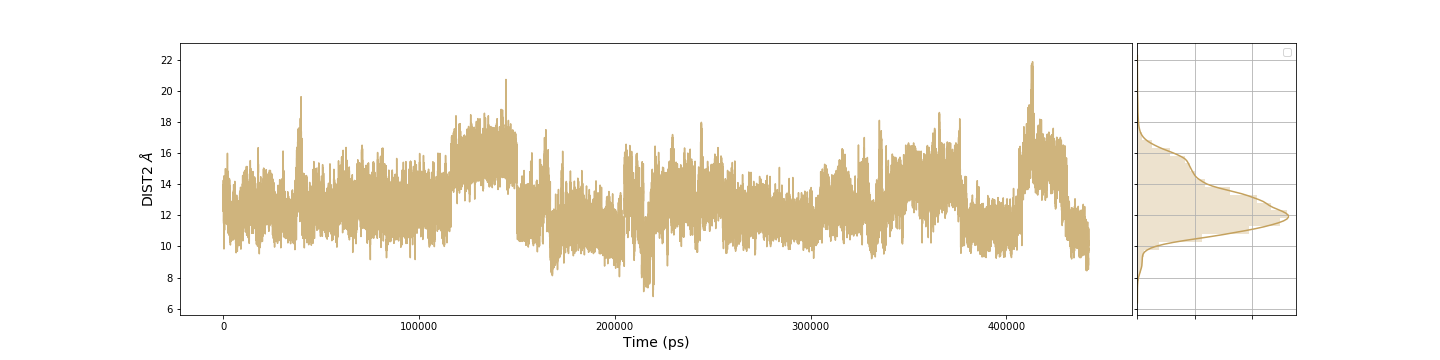

/home/sbhakat/miniconda2/envs/py36/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/sbhakat/miniconda2/envs/py36/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/sbhakat/miniconda2/envs/py36/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/home/sbhakat/miniconda2/envs/py36/lib/python3.6/site-packages/matplotlib/cbook/__init__

(<matplotlib.axes._subplots.AxesSubplot at 0x7fccf6d31630>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fccf6bf9518>)

In [55]:
lp=np.loadtxt(f"COLVAR", comments="#")[:, 1]*10
import msmexplorer as msme

# Plot Trace
msme.plot_trace(lp, xlabel='Time (ps)', ylabel='DIST2 $\AA$', color='dijon' )

<IPython.core.display.Javascript object>


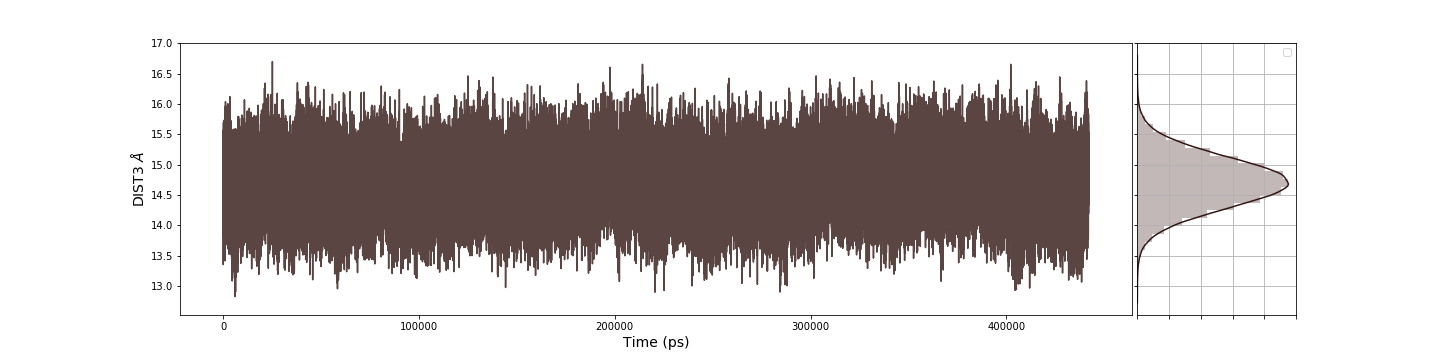

/home/sbhakat/miniconda2/envs/py36/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/sbhakat/miniconda2/envs/py36/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/sbhakat/miniconda2/envs/py36/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/home/sbhakat/miniconda2/envs/py36/lib/python3.6/site-packages/matplotlib/cbook/__init__

(<matplotlib.axes._subplots.AxesSubplot at 0x7fccf6bf9320>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fccf6cfe048>)

In [56]:
lp=np.loadtxt(f"COLVAR", comments="#")[:, 2]*10
import msmexplorer as msme

# Plot Trace
msme.plot_trace(lp, xlabel='Time (ps)', ylabel='DIST3 $\AA$', color='oxblood' )

## Plotting Tyr-Trp & Tyr-Asp

[ 4.1004   4.25664  3.4994  ...,  7.98905  8.35661  7.32602]
x-axis minimum and maximum is 0.0 and 442.0
y1-axis minimum and maximum is 2.5 and 10.2
y2-axis minimum and maximum is 2.8 and 15.2


<IPython.core.display.Javascript object>


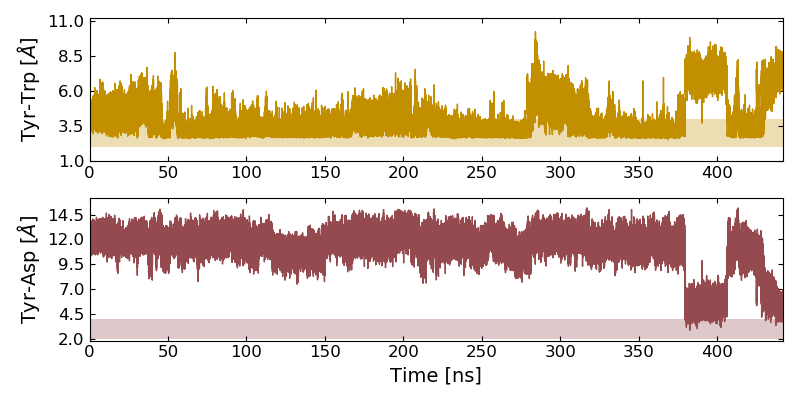

In [12]:
#Plot the CV space that has been sampled during the Funnel MetaD simulation#
%matplotlib notebook

#Read time and convert to ns
Time=np.loadtxt(f"COLVAR", comments="#")[:, 0]/1000
#Read CVs and convert to Angstrom
lp=np.loadtxt(f"COLVAR", comments="#")[:, 3]*10
ld=np.loadtxt(f"COLVAR", comments="#")[:, 8]*10
print(lp)
xmin=float("{0:.0f}".format(np.amin(Time)))              
xmax=float("{0:.0f}".format(np.amax(Time)))
y1min=float("{0:.1f}".format(np.amin(lp)))
y1max=float("{0:.1f}".format(np.amax(lp))) 
y2min=float("{0:.1f}".format(np.amin(ld)))
y2max=float("{0:.1f}".format(np.amax(ld))) 

#leg=[f"Run{run}"]
large_font=14
small_font=12
print(f"x-axis minimum and maximum is {xmin} and {xmax}")
print(f"y1-axis minimum and maximum is {y1min} and {y1max}")
print(f"y2-axis minimum and maximum is {y2min} and {y2max}")             
              
fig, (ax1, ax2) = plt.subplots(2,1,figsize=(8,4))
#fig.suptitle(f"Run{run}")
ax1.plot(Time, lp, color=col1['yellow'], linewidth=1.0)
ax2.plot(Time, ld, color=col1['red'], linewidth=1.0)
ax1.set_xlim([xmin, xmax])
ax2.set_xlim([xmin, xmax])
ax1.set_ylim([y1min-1, y1max+1])
ax2.set_ylim([y2min-1, y2max+1])
ax1.xaxis.set_ticks(np.arange(xmin, xmax+1, 50))
ax2.xaxis.set_ticks(np.arange(xmin, xmax+1, 50))
ax1.yaxis.set_ticks(np.arange(int(y1min-1), int(y1max)+2, 2.5))
ax2.yaxis.set_ticks(np.arange(int(y2min), int(y2max)+2, 2.5))
#ax1.axes.get_xaxis().set_visible(False)
ax2.set_xlabel('Time [ns]', fontsize=large_font)
ax1.set_ylabel('Tyr-Trp [$\AA$]', fontsize=large_font)
ax2.set_ylabel('Tyr-Asp [$\AA$]', fontsize=large_font)
ax1.tick_params(axis='both', bottom=True, top=True, right=True, which='major', labelbottom=True, labeltop=False, direction='in', labelsize=small_font)
ax2.tick_params(axis='both', bottom=True, top=True, right=True, which='major', labelbottom=True, labeltop=False, direction='in', labelsize=small_font)
# ax1.axhline(3.0, color='black',  linestyle='dashed')
# ax1.axhline(-4.0, color='black',  linestyle='dashed')
# ax2.axhline(4.0, color='black',  linestyle='dashed')
ax1.axhspan(2, 4, facecolor=col1['yellow'], alpha=0.3)
ax2.axhspan(2, 4, facecolor=col1['red'], alpha=0.3)
# ax1.legend(leg, loc=1,  fancybox=True, shadow=True)
# ax2.legend(leg, loc=1,  fancybox=True, shadow=True)


fig.subplots_adjust(wspace=0, hspace=0)

fig.tight_layout()

plt.savefig(f"tyr-trp-asp-dist.png", bbox_inches='tight', dpi=600)
plt.show()
#plt.close()

## Plotting Dihedral angles

[ -59.79863104  -49.52303405  -45.5352478  ..., -175.4047264  -172.75582793
 -167.81784847]
x-axis minimum and maximum is 0.0 and 442.0
y1-axis minimum and maximum is -180.0 and 180.0
y2-axis minimum and maximum is -177.8 and 179.0


<IPython.core.display.Javascript object>


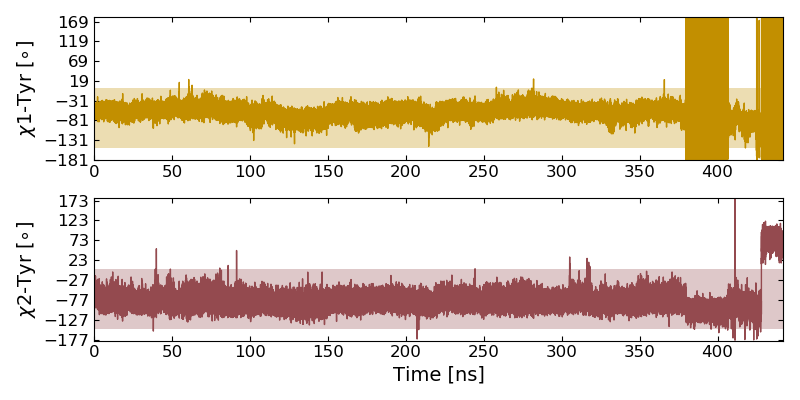

In [22]:
#Plot the CV space that has been sampled during the Funnel MetaD simulation#
%matplotlib notebook

#Read time and convert to ns
Time=np.loadtxt(f"COLVAR", comments="#")[:, 0]/1000
#Read CVs and convert to Angstrom
lp=np.loadtxt(f"COLVAR", comments="#")[:, 9]*57.2957795
ld=np.loadtxt(f"COLVAR", comments="#")[:, 10]*57.2957795
print(lp)
xmin=float("{0:.0f}".format(np.amin(Time)))              
xmax=float("{0:.0f}".format(np.amax(Time)))
y1min=float("{0:.1f}".format(np.amin(lp)))
y1max=float("{0:.1f}".format(np.amax(lp))) 
y2min=float("{0:.1f}".format(np.amin(ld)))
y2max=float("{0:.1f}".format(np.amax(ld))) 

#leg=[f"Run{run}"]
large_font=14
small_font=12
print(f"x-axis minimum and maximum is {xmin} and {xmax}")
print(f"y1-axis minimum and maximum is {y1min} and {y1max}")
print(f"y2-axis minimum and maximum is {y2min} and {y2max}")             
              
fig, (ax1, ax2) = plt.subplots(2,1,figsize=(8,4))
#fig.suptitle(f"Run{run}")
ax1.plot(Time, lp, color=col1['yellow'], linewidth=1.0)
ax2.plot(Time, ld, color=col1['red'], linewidth=1.0)
ax1.set_xlim([xmin, xmax])
ax2.set_xlim([xmin, xmax])
ax1.set_ylim([y1min-1, y1max+1])
ax2.set_ylim([y2min-1, y2max+1])
ax1.xaxis.set_ticks(np.arange(xmin, xmax+1, 50))
ax2.xaxis.set_ticks(np.arange(xmin, xmax+1, 50))
ax1.yaxis.set_ticks(np.arange(int(y1min-1), int(y1max)+2, 50))
ax2.yaxis.set_ticks(np.arange(int(y2min), int(y2max)+2, 50))
#ax1.axes.get_xaxis().set_visible(False)
ax2.set_xlabel('Time [ns]', fontsize=large_font)
ax1.set_ylabel('$\chi1$-Tyr [$\circ$]', fontsize=large_font)
ax2.set_ylabel('$\chi2$-Tyr [$\circ$]', fontsize=large_font)
ax1.tick_params(axis='both', bottom=True, top=True, right=True, which='major', labelbottom=True, labeltop=False, direction='in', labelsize=small_font)
ax2.tick_params(axis='both', bottom=True, top=True, right=True, which='major', labelbottom=True, labeltop=False, direction='in', labelsize=small_font)
# ax1.axhline(3.0, color='black',  linestyle='dashed')
# ax1.axhline(-4.0, color='black',  linestyle='dashed')
# ax2.axhline(4.0, color='black',  linestyle='dashed')
ax1.axhspan(-150, 0, facecolor=col1['yellow'], alpha=0.3)
ax2.axhspan(-150, 0, facecolor=col1['red'], alpha=0.3)
# ax1.legend(leg, loc=1,  fancybox=True, shadow=True)
# ax2.legend(leg, loc=1,  fancybox=True, shadow=True)


fig.subplots_adjust(wspace=0, hspace=0)

fig.tight_layout()

plt.savefig(f"chi1-chi2-simulationtime.png", bbox_inches='tight', dpi=600)
plt.show()
#plt.close()

[ -59.79863104  -49.52303405  -45.5352478  ..., -175.4047264  -172.75582793
 -167.81784847]
x-axis minimum and maximum is 0.0 and 442.0
y1-axis minimum and maximum is -180.0 and 180.0
y2-axis minimum and maximum is -177.8 and 179.0


<IPython.core.display.Javascript object>


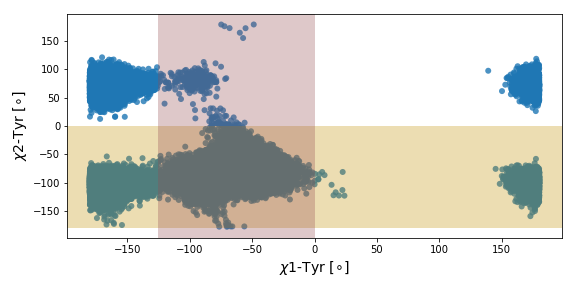

In [39]:
#Plot the CV space that has been sampled during the Funnel MetaD simulation#
%matplotlib notebook

#Read time and convert to ns
Time=np.loadtxt(f"COLVAR", comments="#")[:, 0]/1000
#Read CVs and convert to Angstrom
lp=np.loadtxt(f"COLVAR", comments="#")[:, 9]*57.2957795
ld=np.loadtxt(f"COLVAR", comments="#")[:, 10]*57.2957795
print(lp)
xmin=float("{0:.0f}".format(np.amin(Time)))              
xmax=float("{0:.0f}".format(np.amax(Time)))
y1min=float("{0:.1f}".format(np.amin(lp)))
y1max=float("{0:.1f}".format(np.amax(lp))) 
y2min=float("{0:.1f}".format(np.amin(ld)))
y2max=float("{0:.1f}".format(np.amax(ld))) 

#leg=[f"Run{run}"]
large_font=14
small_font=12
print(f"x-axis minimum and maximum is {xmin} and {xmax}")
print(f"y1-axis minimum and maximum is {y1min} and {y1max}")
print(f"y2-axis minimum and maximum is {y2min} and {y2max}")   

fig, ax = plt.subplots(1,1,figsize=(8,4))

ax.scatter(lp, ld, alpha=0.8, edgecolors='none')
ax.set_xlabel('$\chi1$-Tyr [$\circ$]', fontsize=large_font)
ax.set_ylabel('$\chi2$-Tyr [$\circ$]', fontsize=large_font)

#Horizontal and vertical Color Span
ax.axhspan(-180, 0, facecolor=col1['yellow'], alpha=0.3)
ax.axvspan(-125, 0, facecolor=col1['red'], alpha=0.3)

fig.tight_layout()

plt.savefig(f"chi1-chi2-scatter.png", bbox_inches='tight', dpi=600)
plt.show()

## Plotting Histograms

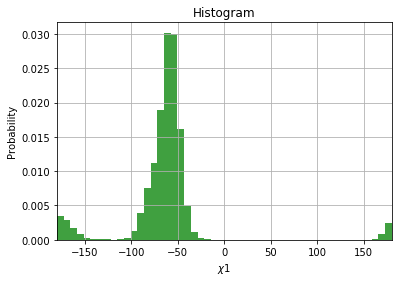

In [23]:
%matplotlib inline

#Read time and convert to ns
Time=np.loadtxt(f"COLVAR", comments="#")[:, 0]/1000
#Read CVs and convert to Angstrom
lp=np.loadtxt(f"COLVAR", comments="#")[:, 3]*57.2957795
ld=np.loadtxt(f"COLVAR", comments="#")[:, 10]*57.2957795

# the histogram of the data
n, bins, patches = plt.hist(lp, 50, density=True, normed=1, facecolor='g', alpha=0.75)


plt.xlabel('$\chi1$')
plt.ylabel('Probability')
plt.title('Histogram')
plt.xlim(-180, 180)
#plt.ylim(0, 0.03)
plt.grid(True)
plt.show()

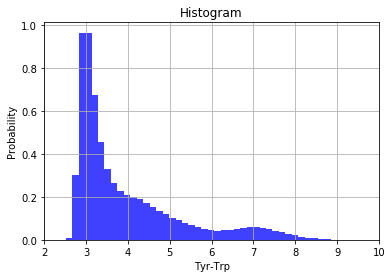

In [31]:
%matplotlib inline

#Read time and convert to ns
Time=np.loadtxt(f"COLVAR", comments="#")[:, 0]/1000
#Read CVs and convert to Angstrom
lp=np.loadtxt(f"COLVAR", comments="#")[:, 3]*10

# the histogram of the data normalised
n, bins, patches = plt.hist(lp, 50, density=True, facecolor='b', alpha=0.75)


plt.xlabel('Tyr-Trp')
plt.ylabel('Probability')
plt.title('Histogram')
plt.xlim(2, 10)
#plt.ylim(0, 0.03)
plt.grid(True)
plt.show()

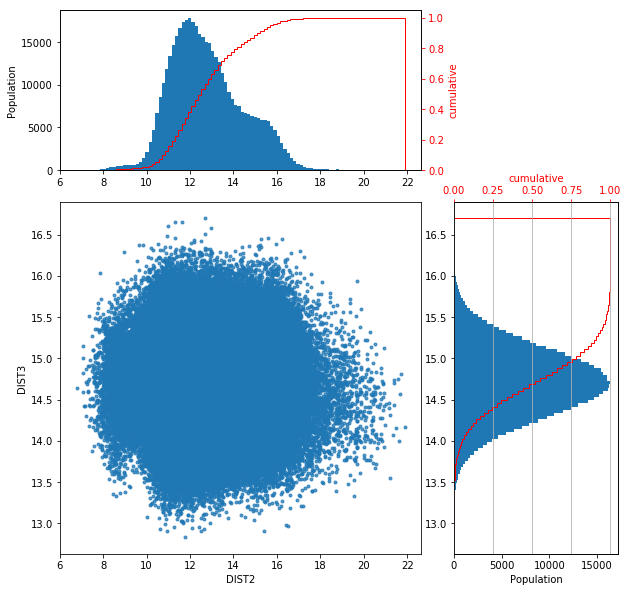

In [37]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np

#Read time and convert to ns
Time=np.loadtxt(f"COLVAR", comments="#")[:, 0]/1000
#Read CVs and convert to Angstrom
lp=np.loadtxt(f"COLVAR", comments="#")[:, 1]*10
ld=np.loadtxt(f"COLVAR", comments="#")[:, 2]*10

fig = plt.figure(figsize=(10,10))
gs = gridspec.GridSpec(3, 3)
ax_main = plt.subplot(gs[1:3, :2])
ax_xDist = plt.subplot(gs[0, :2],sharex=ax_main)
ax_yDist = plt.subplot(gs[1:3, 2],sharey=ax_main)

ax_main.scatter(lp,ld,marker='.',alpha=0.75)
ax_main.set(xlabel="DIST2", ylabel="DIST3")

ax_xDist.hist(lp,bins=100,align='mid')
ax_xDist.set(ylabel='Population')
ax_xCumDist = ax_xDist.twinx()
ax_xCumDist.hist(lp,bins=100,cumulative=True,histtype='step',density=True,color='r',align='mid')
ax_xCumDist.tick_params('y', colors='r')
ax_xCumDist.set_ylabel('cumulative',color='r')

ax_yDist.hist(ld,bins=100,orientation='horizontal',align='mid')
ax_yDist.set(xlabel='Population')
ax_yCumDist = ax_yDist.twiny()
ax_yCumDist.hist(ld,bins=100,cumulative=True,histtype='step',density=True,color='r',align='mid',orientation='horizontal')
ax_yCumDist.tick_params('x', colors='r')
ax_yCumDist.set_xlabel('cumulative',color='r')

plt.grid(True)
plt.savefig('hist_dist2-dist3.png')
plt.show()

## Plotting Trp Dihedrals

[ 66.92427795  74.71891038  66.50556039 ...,  57.66585294  48.48804309
  66.39652652]
x-axis minimum and maximum is 0.0 and 442.0
y1-axis minimum and maximum is 18.9 and 101.8
y2-axis minimum and maximum is -142.5 and -55.1


<IPython.core.display.Javascript object>


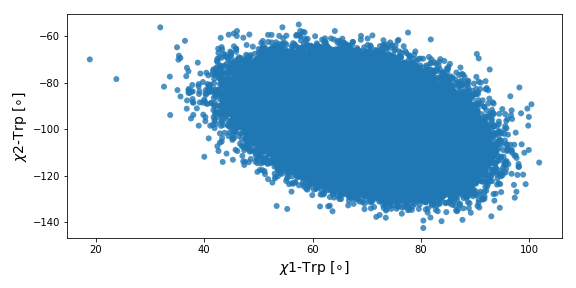

In [43]:
#Plot the CV space that has been sampled during the Funnel MetaD simulation#
%matplotlib notebook

#Read time and convert to ns
Time=np.loadtxt(f"COLVAR", comments="#")[:, 0]/1000
#Read CVs and convert to Angstrom
lp=np.loadtxt(f"COLVAR", comments="#")[:, 11]*57.2957795
ld=np.loadtxt(f"COLVAR", comments="#")[:, 12]*57.2957795
print(lp)
xmin=float("{0:.0f}".format(np.amin(Time)))              
xmax=float("{0:.0f}".format(np.amax(Time)))
y1min=float("{0:.1f}".format(np.amin(lp)))
y1max=float("{0:.1f}".format(np.amax(lp))) 
y2min=float("{0:.1f}".format(np.amin(ld)))
y2max=float("{0:.1f}".format(np.amax(ld))) 

#leg=[f"Run{run}"]
large_font=14
small_font=12
print(f"x-axis minimum and maximum is {xmin} and {xmax}")
print(f"y1-axis minimum and maximum is {y1min} and {y1max}")
print(f"y2-axis minimum and maximum is {y2min} and {y2max}")   

fig, ax = plt.subplots(1,1,figsize=(8,4))

ax.scatter(lp, ld, alpha=0.8, edgecolors='none')
ax.set_xlabel('$\chi1$-Trp [$\circ$]', fontsize=large_font)
ax.set_ylabel('$\chi2$-Trp [$\circ$]', fontsize=large_font)

#Horizontal and vertical Color Span
#ax.axhspan(-180, 0, facecolor=col1['yellow'], alpha=0.3)
#ax.axvspan(-125, 0, facecolor=col1['red'], alpha=0.3)

fig.tight_layout()

plt.savefig(f"chi1-chi2-trp-scatter.png", bbox_inches='tight', dpi=600)
plt.show()

## Plotting biased vs unbiased landscape

In [3]:
import matplotlib.pyplot as plt
import numpy as np
unbiasedCVs = np.genfromtxt('COLVAR',comments='#');

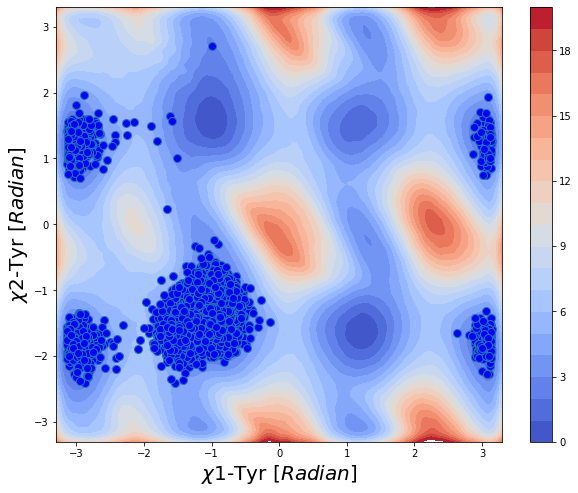

In [29]:
%matplotlib inline
#read the data in from a text file 
fesdata = np.genfromtxt('fes_chi_meta.dat',comments='#');

fesdata = fesdata[:,0:3]
#what was your grid size? this calculates it 
dim=int(np.sqrt(np.size(fesdata)/3))

#some post-processing to be compatible with contourf 
X=np.reshape(fesdata[:,0],[dim,dim],order="F")  #order F was 20% faster than A/C
Y=np.reshape(fesdata[:,1],[dim,dim],order="F") 
Z=np.reshape((fesdata[:,2]-np.min(fesdata[:,2]))/4.184,[dim,dim],order="F")  #convert to kcal/mol

#what spacing do you want?  assume units are in kJ/mol
spacer=1
lines=20
levels=np.linspace(0,lines*spacer,num=(lines+1),endpoint=True)


fig=plt.figure(figsize=(10,8)) 
axes = fig.add_subplot(111)


plt.contourf(X, Y, Z, levels, cmap=plt.cm.coolwarm,)
plt.colorbar()
plt.xlabel('$\chi1$')
plt.ylabel('$\chi2$')

axes.set_xlabel('$\chi1$-Tyr [$Radian$]', fontsize=20)
axes.set_ylabel('$\chi2$-Tyr [$Radian$]', fontsize=20)

axes.set_xlim([-3.3, 3.3])
axes.set_ylim([-3.3, 3.3])

#Plotting unbiased sampling on biased 2D FES
stride=50
#axes.plot(biasedCVs[::stride,1],biasedCVs[::stride,2],marker='o',markersize=8,linestyle='none',markerfacecolor='cyan')
axes.plot(unbiasedCVs[::stride,9],unbiasedCVs[::stride,10],marker='o',markersize=8,linestyle='none',markerfacecolor='blue')
#axes.plot(unbiasedCVsHOT[::stride,1],unbiasedCVsHOT[::stride,2],marker='o',markersize=8,linestyle='none',markerfacecolor='red')

#unbiasedCVs = np.genfromtxt('COLVAR',comments='#');
#stride=5
#axes.plot(unbiasedCVs[::stride,1],unbiasedCVs[::stride,2],marker='o',markersize=8,linestyle='none',markerfacecolor='yellow')
#Horizontal and vertical Color Span



plt.savefig('fes_bias.png')
plt.show()

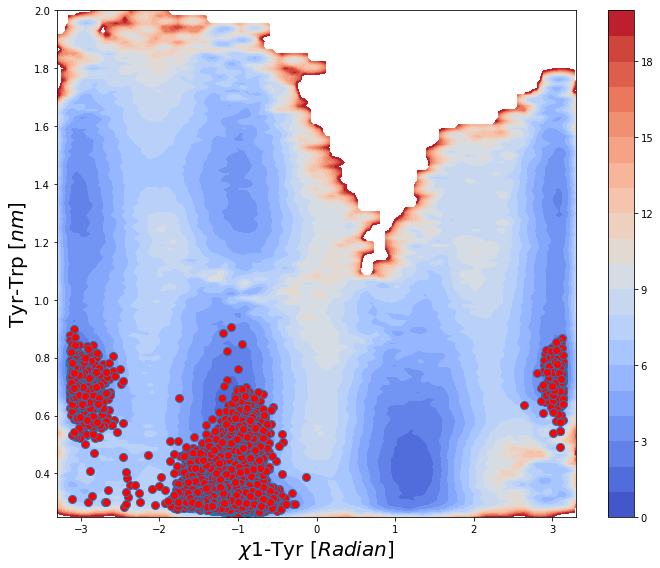

In [48]:
%matplotlib inline
#read the data in from a text file 
fesdata = np.genfromtxt('fes_trp.dat',comments='#');

fesdata = fesdata[:,0:3]
#what was your grid size? this calculates it 
dim=int(np.sqrt(np.size(fesdata)/3))

#some post-processing to be compatible with contourf 
X=np.reshape(fesdata[:,0],[dim,dim],order="F")  #order F was 20% faster than A/C
Y=np.reshape(fesdata[:,1],[dim,dim],order="F") 
Z=np.reshape((fesdata[:,2]-np.min(fesdata[:,2]))/4.184,[dim,dim],order="F")  #convert to kcal/mol

#what spacing do you want?  assume units are in kJ/mol
spacer=1
lines=20
levels=np.linspace(0,lines*spacer,num=(lines+1),endpoint=True)


fig=plt.figure(figsize=(10,8)) 
axes = fig.add_subplot(111)


plt.contourf(X, Y, Z, levels, cmap=plt.cm.coolwarm,)
plt.colorbar()
plt.xlabel('$\chi1$')
plt.ylabel('$\chi2$')

axes.set_xlabel('$\chi1$-Tyr [$Radian$]', fontsize=20)
axes.set_ylabel('Tyr-Trp [$nm$]', fontsize=20)

axes.set_xlim([-3.3, 3.3])
axes.set_ylim([0.25, 2.0])


#Plotting unbiased sampling on biased 2D FES
stride=50
#axes.plot(biasedCVs[::stride,1],biasedCVs[::stride,2],marker='o',markersize=8,linestyle='none',markerfacecolor='cyan')
axes.plot(unbiasedCVs[::stride,9],unbiasedCVs[::stride,3],marker='o',markersize=8,linestyle='none',markerfacecolor='red')
#axes.plot(unbiasedCVsHOT[::stride,1],unbiasedCVsHOT[::stride,2],marker='o',markersize=8,linestyle='none',markerfacecolor='red')

#unbiasedCVs = np.genfromtxt('COLVAR',comments='#');
#stride=5
#axes.plot(unbiasedCVs[::stride,1],unbiasedCVs[::stride,2],marker='o',markersize=8,linestyle='none',markerfacecolor='yellow')


plt.tight_layout()
plt.savefig('fes_bias-chi1-trp.png')
plt.show()

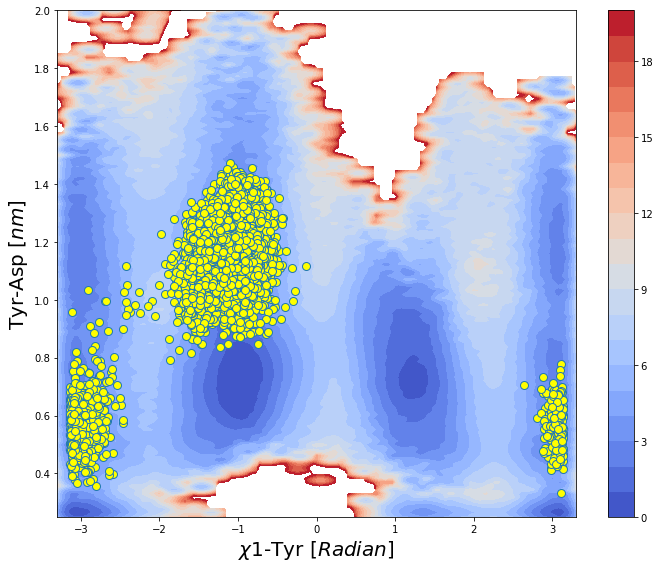

In [40]:
%matplotlib inline
#read the data in from a text file 
fesdata = np.genfromtxt('fes_asp.dat',comments='#');

fesdata = fesdata[:,0:3]
#what was your grid size? this calculates it 
dim=int(np.sqrt(np.size(fesdata)/3))

#some post-processing to be compatible with contourf 
X=np.reshape(fesdata[:,0],[dim,dim],order="F")  #order F was 20% faster than A/C
Y=np.reshape(fesdata[:,1],[dim,dim],order="F") 
Z=np.reshape((fesdata[:,2]-np.min(fesdata[:,2]))/4.184,[dim,dim],order="F")  #convert to kcal/mol

#what spacing do you want?  assume units are in kJ/mol
spacer=1
lines=20
levels=np.linspace(0,lines*spacer,num=(lines+1),endpoint=True)


fig=plt.figure(figsize=(10,8)) 
axes = fig.add_subplot(111)


plt.contourf(X, Y, Z, levels, cmap=plt.cm.coolwarm,)
plt.colorbar()
plt.xlabel('$\chi1$')
plt.ylabel('$\chi2$')

axes.set_xlabel('$\chi1$-Tyr [$Radian$]', fontsize=20)
axes.set_ylabel('Tyr-Asp [$nm$]', fontsize=20)

axes.set_xlim([-3.3, 3.3])
axes.set_ylim([0.25, 2.0])


#Plotting unbiased sampling on biased 2D FES
stride=50
#axes.plot(biasedCVs[::stride,1],biasedCVs[::stride,2],marker='o',markersize=8,linestyle='none',markerfacecolor='cyan')
axes.plot(unbiasedCVs[::stride,9],unbiasedCVs[::stride,8],marker='o',markersize=8,linestyle='none',markerfacecolor='yellow')
#axes.plot(unbiasedCVsHOT[::stride,1],unbiasedCVsHOT[::stride,2],marker='o',markersize=8,linestyle='none',markerfacecolor='red')

#unbiasedCVs = np.genfromtxt('COLVAR',comments='#');
#stride=5
#axes.plot(unbiasedCVs[::stride,1],unbiasedCVs[::stride,2],marker='o',markersize=8,linestyle='none',markerfacecolor='yellow')

plt.tight_layout()

plt.savefig('fes_bias-chi1-asp.png')
plt.show()

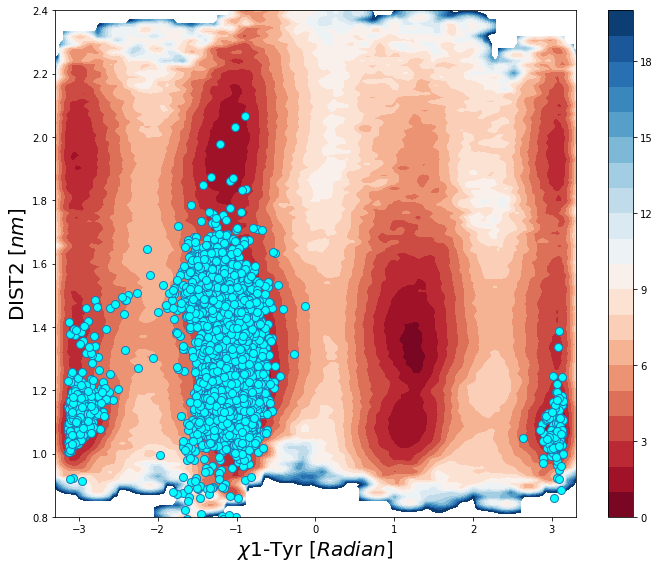

In [47]:
%matplotlib inline
#read the data in from a text file 
fesdata = np.genfromtxt('fes_dist2.dat',comments='#');

fesdata = fesdata[:,0:3]
#what was your grid size? this calculates it 
dim=int(np.sqrt(np.size(fesdata)/3))

#some post-processing to be compatible with contourf 
X=np.reshape(fesdata[:,0],[dim,dim],order="F")  #order F was 20% faster than A/C
Y=np.reshape(fesdata[:,1],[dim,dim],order="F") 
Z=np.reshape((fesdata[:,2]-np.min(fesdata[:,2]))/4.184,[dim,dim],order="F")  #convert to kcal/mol

#what spacing do you want?  assume units are in kJ/mol
spacer=1
lines=20
levels=np.linspace(0,lines*spacer,num=(lines+1),endpoint=True)


fig=plt.figure(figsize=(10,8)) 
axes = fig.add_subplot(111)


plt.contourf(X, Y, Z, levels, cmap=plt.cm.RdBu,)
plt.colorbar()
plt.xlabel('$\chi1$')
plt.ylabel('$\chi2$')

axes.set_xlabel('$\chi1$-Tyr [$Radian$]', fontsize=20)
axes.set_ylabel('DIST2 [$nm$]', fontsize=20)

axes.set_xlim([-3.3, 3.3])
axes.set_ylim([0.8, 2.4])


#Plotting unbiased sampling on biased 2D FES
stride=100
#axes.plot(biasedCVs[::stride,1],biasedCVs[::stride,2],marker='o',markersize=8,linestyle='none',markerfacecolor='cyan')
axes.plot(unbiasedCVs[::stride,9],unbiasedCVs[::stride,1],marker='o',markersize=8,linestyle='none',markerfacecolor='cyan')
#axes.plot(unbiasedCVsHOT[::stride,1],unbiasedCVsHOT[::stride,2],marker='o',markersize=8,linestyle='none',markerfacecolor='red')

#unbiasedCVs = np.genfromtxt('COLVAR',comments='#');
#stride=5
#axes.plot(unbiasedCVs[::stride,1],unbiasedCVs[::stride,2],marker='o',markersize=8,linestyle='none',markerfacecolor='yellow')

plt.tight_layout()

plt.savefig('fes_bias-chi1-dist2.png')
plt.show()

## Plotting HILLS

x-axis minimum and maximum is 0.0 and 887.0
y-axis minimum and maximum is 0.0 and 0.3


<ipython-input-57-47ee437dd82d>:24: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  ax1.yaxis.set_ticks(np.arange(ymin, ymax), 0.1)


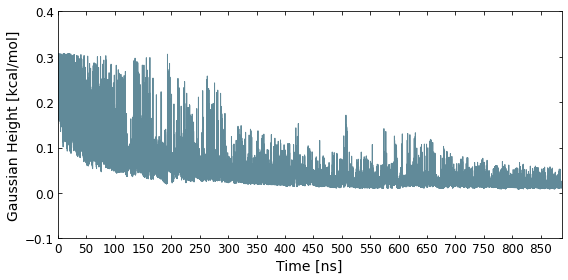

In [57]:
#Plot the Gaussian height as a function of time for a well-tempered Metadynamics simulation##
%matplotlib inline
large_font=14
small_font=12

Time=np.loadtxt(f"HILLS")[:, 0]/1000
GH=np.loadtxt(f"HILLS")[:, 5]/4.186798

xmin=float("{0:.1f}".format(np.amin(Time)))              
xmax=float("{0:.1f}".format(np.amax(Time)))
ymin=float("{0:.1f}".format(np.amin(GH)))
ymax=float("{0:.1f}".format(np.amax(GH)))            

print(f"x-axis minimum and maximum is {xmin} and {xmax}")
print(f"y-axis minimum and maximum is {ymin} and {ymax}")
              
              
fig, (ax1) = plt.subplots(1,figsize=(8,4))

ax1.plot(Time[::20], GH[::20], color=col1['blue'], linewidth=1.0)
ax1.set_xlim([xmin, xmax])
ax1.set_ylim([ymin-0.1, ymax+0.1])
ax1.xaxis.set_ticks(np.arange(int(xmin), int(xmax), 50))
ax1.yaxis.set_ticks(np.arange(ymin, ymax), 0.1)
ax1.tick_params(axis='both', bottom=True, top=True, right=True, which='major', labelbottom=True, labeltop=False, direction='in', labelsize=small_font)
ax1.set_xlabel('Time [ns]', fontsize=large_font)
ax1.set_ylabel('Gaussian Height [kcal/mol]', fontsize=large_font)
# ax1.legend(leg, loc=1,  fancybox=True, shadow=True)

fig.tight_layout()

plt.savefig(f"gaussian-height.png", bbox_inches='tight', dpi=600)
plt.show()
#plt.close()

## Plotting c(t) metadynamics

x-axis minimum and maximum is 0.0 and 887.0
y-axis minimum and maximum is 0.0 and 116.0


<ipython-input-63-6facb4c2a089>:24: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  ax1.yaxis.set_ticks(np.arange(ymin, ymax), 0.1)


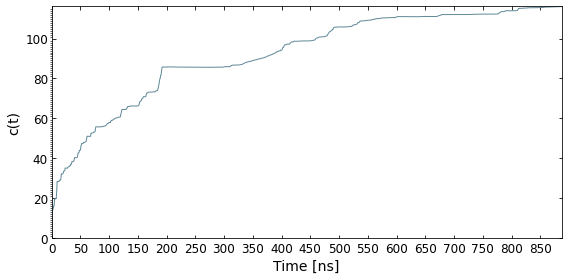

In [63]:
#Plot the Gaussian height as a function of time for a well-tempered Metadynamics simulation##
%matplotlib inline
large_font=14
small_font=12

Time=np.loadtxt(f"COLVAR-metad")[:, 0]/1000
GH=np.loadtxt(f"COLVAR-metad")[:, 9]

xmin=float("{0:.1f}".format(np.amin(Time)))              
xmax=float("{0:.1f}".format(np.amax(Time)))
ymin=float("{0:.1f}".format(np.amin(GH)))
ymax=float("{0:.1f}".format(np.amax(GH)))            

print(f"x-axis minimum and maximum is {xmin} and {xmax}")
print(f"y-axis minimum and maximum is {ymin} and {ymax}")
              
              
fig, (ax1) = plt.subplots(1,figsize=(8,4))

ax1.plot(Time[::20], GH[::20], color=col1['blue'], linewidth=1.0)
ax1.set_xlim([xmin, xmax])
ax1.set_ylim([ymin-0.1, ymax+0.1])
ax1.xaxis.set_ticks(np.arange(int(xmin), int(xmax), 50))
ax1.yaxis.set_ticks(np.arange(ymin, ymax), 0.1)
ax1.tick_params(axis='both', bottom=True, top=True, right=True, which='major', labelbottom=True, labeltop=False, direction='in', labelsize=small_font)
ax1.set_xlabel('Time [ns]', fontsize=large_font)
ax1.set_ylabel('c(t)', fontsize=large_font)
# ax1.legend(leg, loc=1,  fancybox=True, shadow=True)

fig.tight_layout()

plt.savefig(f"metad-ct.png", bbox_inches='tight', dpi=600)
plt.show()
#plt.close()

## Plotting 4Z22-MD

In [4]:
import matplotlib.pyplot as plt
import numpy as np
unbiasedCVs = np.genfromtxt('4Z22/COLVAR',comments='#');

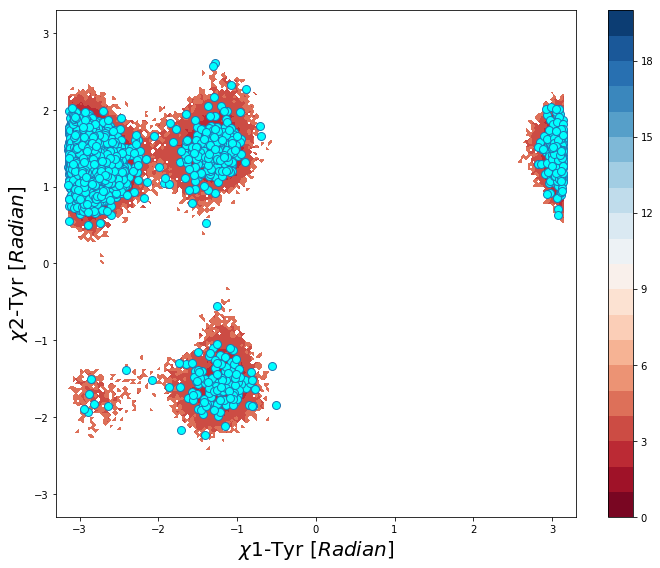

In [6]:
%matplotlib inline
#read the data in from a text file 
fesdata = np.genfromtxt('4Z22/fes_chityr.dat',comments='#');

fesdata = fesdata[:,0:3]
#what was your grid size? this calculates it 
dim=int(np.sqrt(np.size(fesdata)/3))

#some post-processing to be compatible with contourf 
X=np.reshape(fesdata[:,0],[dim,dim],order="F")  #order F was 20% faster than A/C
Y=np.reshape(fesdata[:,1],[dim,dim],order="F") 
Z=np.reshape((fesdata[:,2]-np.min(fesdata[:,2]))/4.184,[dim,dim],order="F")  #convert to kcal/mol

#what spacing do you want?  assume units are in kJ/mol
spacer=1
lines=20
levels=np.linspace(0,lines*spacer,num=(lines+1),endpoint=True)


fig=plt.figure(figsize=(10,8)) 
axes = fig.add_subplot(111)


plt.contourf(X, Y, Z, levels, cmap=plt.cm.RdBu,)
plt.colorbar()
plt.xlabel('$\chi1$')
plt.ylabel('$\chi2$')

axes.set_xlabel('$\chi1$-Tyr [$Radian$]', fontsize=20)
axes.set_ylabel('$\chi2$-Tyr [$Radian$]', fontsize=20)

axes.set_xlim([-3.3, 3.3])
axes.set_ylim([-3.3, 3.3])


#Plotting unbiased sampling on biased 2D FES
stride=100
#axes.plot(biasedCVs[::stride,1],biasedCVs[::stride,2],marker='o',markersize=8,linestyle='none',markerfacecolor='cyan')
axes.plot(unbiasedCVs[::stride,1],unbiasedCVs[::stride,2],marker='o',markersize=8,linestyle='none',markerfacecolor='cyan')
#axes.plot(unbiasedCVsHOT[::stride,1],unbiasedCVsHOT[::stride,2],marker='o',markersize=8,linestyle='none',markerfacecolor='red')

#unbiasedCVs = np.genfromtxt('COLVAR',comments='#');
#stride=5
#axes.plot(unbiasedCVs[::stride,1],unbiasedCVs[::stride,2],marker='o',markersize=8,linestyle='none',markerfacecolor='yellow')

plt.tight_layout()

plt.savefig('fes_chi1-4z22.png')
plt.show()

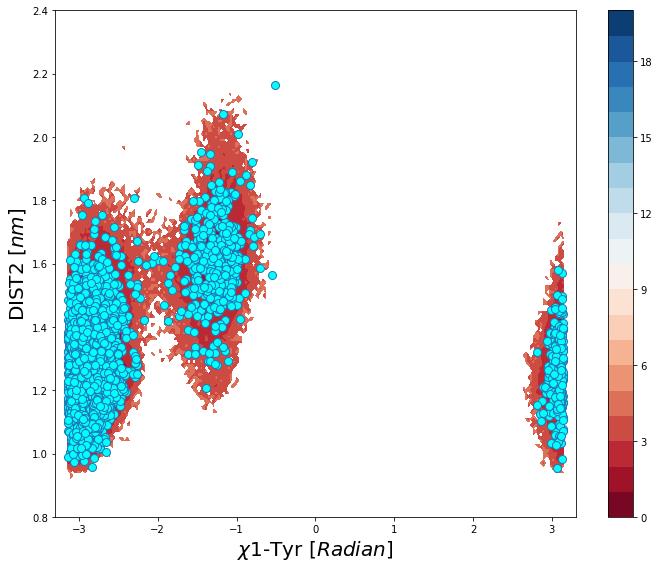

In [9]:
%matplotlib inline
#read the data in from a text file 
fesdata = np.genfromtxt('4Z22/fes_chityrdist2.dat',comments='#');

fesdata = fesdata[:,0:3]
#what was your grid size? this calculates it 
dim=int(np.sqrt(np.size(fesdata)/3))

#some post-processing to be compatible with contourf 
X=np.reshape(fesdata[:,0],[dim,dim],order="F")  #order F was 20% faster than A/C
Y=np.reshape(fesdata[:,1],[dim,dim],order="F") 
Z=np.reshape((fesdata[:,2]-np.min(fesdata[:,2]))/4.184,[dim,dim],order="F")  #convert to kcal/mol

#what spacing do you want?  assume units are in kJ/mol
spacer=1
lines=20
levels=np.linspace(0,lines*spacer,num=(lines+1),endpoint=True)


fig=plt.figure(figsize=(10,8)) 
axes = fig.add_subplot(111)


plt.contourf(X, Y, Z, levels, cmap=plt.cm.RdBu,)
plt.colorbar()
plt.xlabel('$\chi1$')
plt.ylabel('$\chi2$')

axes.set_xlabel('$\chi1$-Tyr [$Radian$]', fontsize=20)
axes.set_ylabel('DIST2 [$nm$]', fontsize=20)

axes.set_xlim([-3.3, 3.3])
axes.set_ylim([0.8, 2.4])


#Plotting unbiased sampling on biased 2D FES
stride=100
#axes.plot(biasedCVs[::stride,1],biasedCVs[::stride,2],marker='o',markersize=8,linestyle='none',markerfacecolor='cyan')
axes.plot(unbiasedCVs[::stride,1],unbiasedCVs[::stride,9],marker='o',markersize=8,linestyle='none',markerfacecolor='cyan')
#axes.plot(unbiasedCVsHOT[::stride,1],unbiasedCVsHOT[::stride,2],marker='o',markersize=8,linestyle='none',markerfacecolor='red')

#unbiasedCVs = np.genfromtxt('COLVAR',comments='#');
#stride=5
#axes.plot(unbiasedCVs[::stride,1],unbiasedCVs[::stride,2],marker='o',markersize=8,linestyle='none',markerfacecolor='yellow')

plt.tight_layout()

plt.savefig('fes_chi1dist2-4z22.png')
plt.show()

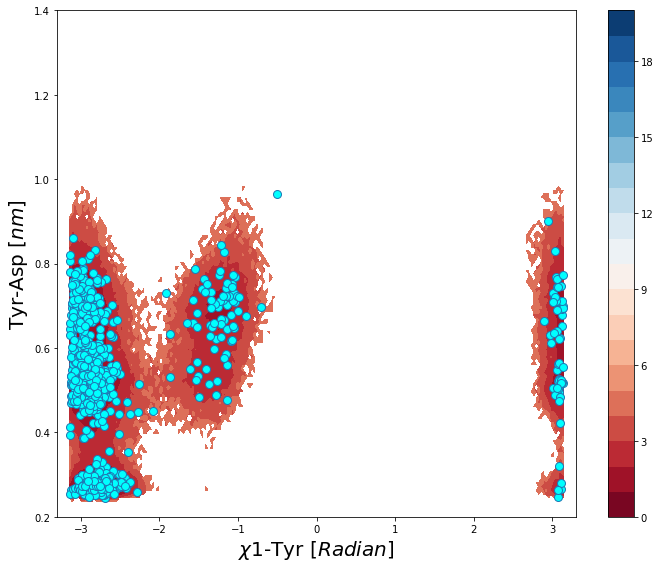

In [16]:
%matplotlib inline
#read the data in from a text file 
fesdata = np.genfromtxt('4Z22/fes_chityrclose.dat',comments='#');

fesdata = fesdata[:,0:3]
#what was your grid size? this calculates it 
dim=int(np.sqrt(np.size(fesdata)/3))

#some post-processing to be compatible with contourf 
X=np.reshape(fesdata[:,0],[dim,dim],order="F")  #order F was 20% faster than A/C
Y=np.reshape(fesdata[:,1],[dim,dim],order="F") 
Z=np.reshape((fesdata[:,2]-np.min(fesdata[:,2]))/4.184,[dim,dim],order="F")  #convert to kcal/mol

#what spacing do you want?  assume units are in kJ/mol
spacer=1
lines=20
levels=np.linspace(0,lines*spacer,num=(lines+1),endpoint=True)


fig=plt.figure(figsize=(10,8)) 
axes = fig.add_subplot(111)


plt.contourf(X, Y, Z, levels, cmap=plt.cm.RdBu,)
plt.colorbar()
plt.xlabel('$\chi1$')
plt.ylabel('$\chi2$')

axes.set_xlabel('$\chi1$-Tyr [$Radian$]', fontsize=20)
axes.set_ylabel('Tyr-Asp [$nm$]', fontsize=20)

axes.set_xlim([-3.3, 3.3])
axes.set_ylim([0.2, 1.4])


#Plotting unbiased sampling on biased 2D FES
stride=500
#axes.plot(biasedCVs[::stride,1],biasedCVs[::stride,2],marker='o',markersize=8,linestyle='none',markerfacecolor='cyan')
axes.plot(unbiasedCVs[::stride,1],unbiasedCVs[::stride,8],marker='o',markersize=8,linestyle='none',markerfacecolor='cyan')
#axes.plot(unbiasedCVsHOT[::stride,1],unbiasedCVsHOT[::stride,2],marker='o',markersize=8,linestyle='none',markerfacecolor='red')

#unbiasedCVs = np.genfromtxt('COLVAR',comments='#');
#stride=5
#axes.plot(unbiasedCVs[::stride,1],unbiasedCVs[::stride,2],marker='o',markersize=8,linestyle='none',markerfacecolor='yellow')

plt.tight_layout()

plt.savefig('fes_chi1tyrclose-4z22.png')
plt.show()

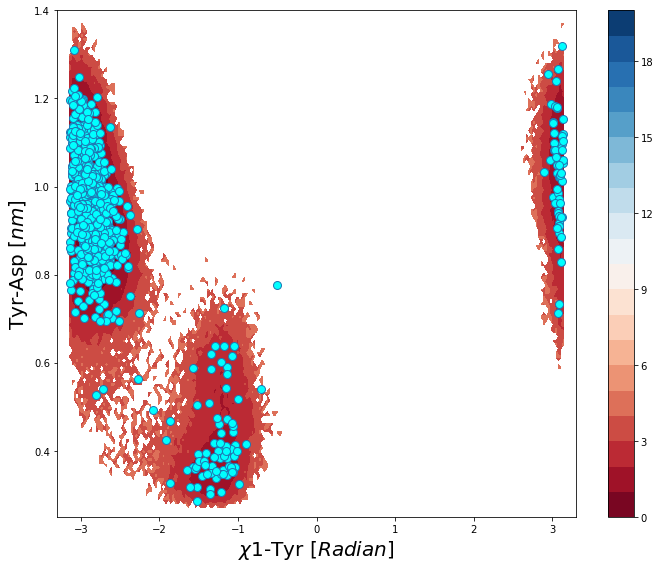

In [19]:
%matplotlib inline
#read the data in from a text file 
fesdata = np.genfromtxt('4Z22/fes_chityrnormal.dat',comments='#');

fesdata = fesdata[:,0:3]
#what was your grid size? this calculates it 
dim=int(np.sqrt(np.size(fesdata)/3))

#some post-processing to be compatible with contourf 
X=np.reshape(fesdata[:,0],[dim,dim],order="F")  #order F was 20% faster than A/C
Y=np.reshape(fesdata[:,1],[dim,dim],order="F") 
Z=np.reshape((fesdata[:,2]-np.min(fesdata[:,2]))/4.184,[dim,dim],order="F")  #convert to kcal/mol

#what spacing do you want?  assume units are in kJ/mol
spacer=1
lines=20
levels=np.linspace(0,lines*spacer,num=(lines+1),endpoint=True)


fig=plt.figure(figsize=(10,8)) 
axes = fig.add_subplot(111)


plt.contourf(X, Y, Z, levels, cmap=plt.cm.RdBu,)
plt.colorbar()
plt.xlabel('$\chi1$')
plt.ylabel('$\chi2$')

axes.set_xlabel('$\chi1$-Tyr [$Radian$]', fontsize=20)
axes.set_ylabel('Tyr-Asp [$nm$]', fontsize=20)

axes.set_xlim([-3.3, 3.3])
axes.set_ylim([0.25, 1.4])


#Plotting unbiased sampling on biased 2D FES
stride=500
#axes.plot(biasedCVs[::stride,1],biasedCVs[::stride,2],marker='o',markersize=8,linestyle='none',markerfacecolor='cyan')
axes.plot(unbiasedCVs[::stride,1],unbiasedCVs[::stride,5],marker='o',markersize=8,linestyle='none',markerfacecolor='cyan')
#axes.plot(unbiasedCVsHOT[::stride,1],unbiasedCVsHOT[::stride,2],marker='o',markersize=8,linestyle='none',markerfacecolor='red')

#unbiasedCVs = np.genfromtxt('COLVAR',comments='#');
#stride=5
#axes.plot(unbiasedCVs[::stride,1],unbiasedCVs[::stride,2],marker='o',markersize=8,linestyle='none',markerfacecolor='yellow')

plt.tight_layout()

plt.savefig('fes_chi1tyrtrp-4z22.png')
plt.show()